In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler




In [ ]:
data = pd.read_excel('Utdata/ALL_data.xlsx')

# Load your data

# Preprocess `Size` column
# Define features and target
features = ['Area', 'City', 'Size', 'Year', 'Type']

target = 'Price'

df = data[features + [target]].dropna()


X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
categorical_features = ['Area', 'City', 'Type']
numerical_features = ['Size', 'Year']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())  # Add standardization step
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ]
)

# Model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(random_state= 42))  # Set alpha to 0.1 (example value)
])

# Train the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.4736311179111713

# Predict on the data 

In [131]:
# Predict
input_data = pd.DataFrame({
    "Area": ["Jätkäsaari"],
    "City": ["Helsinki"],
    "Type":["kerrostalo"],
    "Size": [69],  # example size in m²
    "Year": [2021]  # example year
})
predicted_price = model.predict(input_data)

print(f"Predicted Price: {predicted_price[0]:,.2f} EUR")

Predicted Price: 416,741.97 EUR


# TEST plan


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1295093073156858e+16, tolerance: 3456655400160.794
  model = cd_fast.sparse_enet_coordinate_descent(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6371992487360252.0, tolerance: 3456655400160.794
  model = cd_fast.sparse_enet_coordinate_descent(


ValueError: x and y must have same first dimension, but have shapes (8,) and (7,)

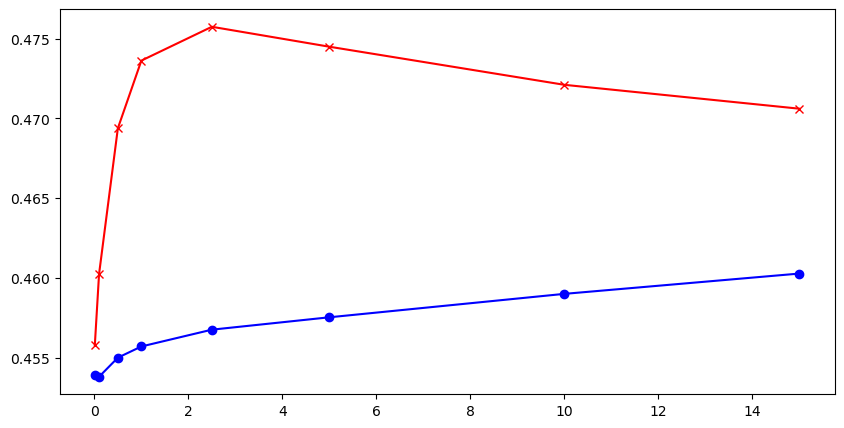

In [ ]:
alphas = [ 0.01, 0.1, 0.5, 1.0, 2.5 , 5.0, 10.0, 15.0]


## Lasso model
test_scores = []

for alpha in alphas:
    Lasso_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha= alpha, max_iter=10000, random_state= 42))  # Set alpha to 0.1 (example value)
])
    Lasso_model.fit(X_train, y_train)
    test_score = Lasso_model.score(X_test, y_test)
    test_scores.append(test_score)
    

Best_Lasso_model= max(test_scores)

## Ridge model
test_scores2 = []

for alpha in alphas:
    Ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha = alpha, max_iter=10000, random_state= 42))  # Set alpha to 0.1 (example value)
])
    Ridge_model.fit(X_train, y_train)
    test_score = Ridge_model.score(X_test, y_test)
    test_scores2.append(test_score)

Best_Ridge_model= max(test_scores2)

## Randomforest


# Plotting the change in test set scores for each alpha
plt.figure(figsize=(10, 5))
plt.plot(alphas, test_scores, marker='o', linestyle='-', color='b', label='Test Score from the Lasso model')
plt.plot(alphas, test_scores2, marker='x', linestyle='-', color='red', label='Test Score from the Ridge model')
plt.plot(alphas, test_scores3, marker='x', linestyle='-', color='green', label='Test Score from the Ridge model')

plt.xlabel('Alpha')
plt.ylabel('Test Set Score')
plt.title('Test Set Score vs Alpha for Lasso Model')
plt.legend()
plt.show()

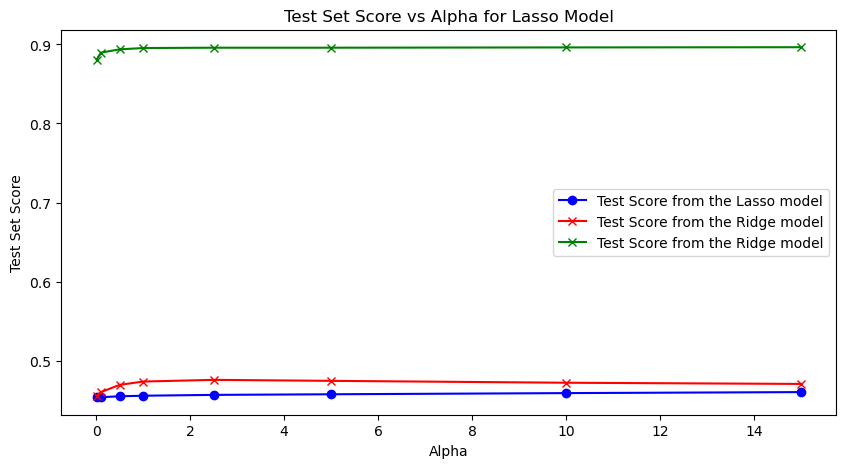

In [113]:
# Plotting the change in test set scores for each alpha
plt.figure(figsize=(10, 5))
plt.plot(alphas, test_scores, marker='o', linestyle='-', color='b', label='Test Score from the Lasso model')
plt.plot(alphas, test_scores2, marker='x', linestyle='-', color='red', label='Test Score from the Ridge model')
plt.plot(alphas, test_scores3, marker='x', linestyle='-', color='green', label='Test Score from the Ridge model')

plt.xlabel('Alpha')
plt.ylabel('Test Set Score')
plt.title('Test Set Score vs Alpha for Lasso Model')
plt.legend()
plt.show()

In [134]:
Numbers_of_trees = [5, 10, 25, 50, 100, 150, 200, 250 ]

test_scores3 = []

for Trees in Numbers_of_trees:
    Random_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators = Trees, random_state= 42))  # Set alpha to 0.1 (example value)
])
    Random_model.fit(X_train, y_train)
    test_score = Random_model.score(X_test, y_test)
    test_scores3.append(test_score)
    

Best_Randomforest_model= max(test_scores3)
Best_Randomforest_model



-3.3591515614987344

In [135]:


# Model pipeline
Random_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators = 250, random_state= 42))  # Set alpha to 0.1 (example value)
])

# Train the model
Random_model.fit(X_train, y_train)
Random_model.score(X_test, y_test)


-6.298421092838977

In [137]:
# Predict
input_data = pd.DataFrame({
    "Area": ["Jätkäsaari"],
    "City": ["Helsinki"],
    "Type":["kerrostalo"],
    "Size": [60],  # example size in m²
    "Year": [2021]  # example year
})
predicted_price = Random_model.predict(input_data)

print(f"Predicted Price: {predicted_price[0]:,.2f} EUR")

Predicted Price: 345,494.47 EUR


[-63.433461447873256,
 -22.285600648010828,
 -4.5146313962882445,
 -3.3591515614987344,
 -4.921221179799897,
 -5.228129393583345,
 -5.878577432674692]